In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [2]:
def read_bids_comparison(folder):
    with open(os.path.join(folder, 'bids_comparison.json'), 'r') as fin:
        return json.load(fin)

In [3]:
def plot_bar(x, y, text_x, text_y, title, fontsize_x=None, rotation_x=None):
    index = np.arange(len(x))
    plt.bar(index, y)
    plt.xlabel(text_x) #, fontsize=5)
    plt.ylabel(text_y) #, fontsize=5)
    plt.xticks(index, x, fontsize=fontsize_x, rotation=rotation_x)#, fontsize=5, rotation=30)
    plt.title(title)
    plt.show()

In [4]:
def get_wins_per_transporter(bids_comparison):
    icnet = {}
    aicnet = {}
    for bid in bids_comparison:
        t_icnet = bid['transporter']['icnet']
        if t_icnet not in icnet:
            icnet[t_icnet] = 0
        
        t_aicnet = bid['transporter']['aicnet']
        if t_aicnet not in aicnet:
            aicnet[t_aicnet] = 0
        
        icnet[t_icnet] +=1
        aicnet[t_aicnet] +=1
    
    return icnet, aicnet
        

In [5]:
def show_total_wins_per_transpoter(folder):
    bids_comparison = read_bids_comparison(folder)
    icnet_wpt, aicnet_wpt = get_wins_per_transporter(bids_comparison)
    
    # ICNET
    plot_bar(
        [x for x in icnet_wpt],
        [icnet_wpt[x] for x in icnet_wpt],
        'Transporter', 'Wins', 'Transpoter / Number of wins',
        fontsize_x = 5
    )
    
    # AICNET
    plot_bar(
        [x for x in aicnet_wpt],
        [aicnet_wpt[x] for x in aicnet_wpt],
        'Transporter', 'Wins', 'Transpoter / Number of wins',
        fontsize_x = 5
    )

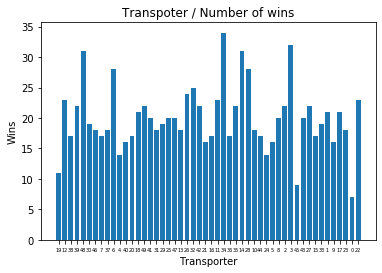

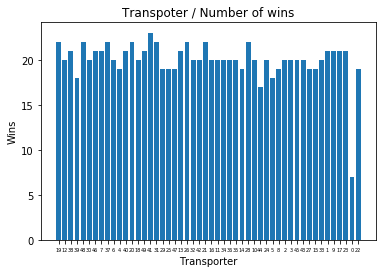

In [6]:
show_total_wins_per_transpoter('new_simulations/500_LOW_PRICE_LENIENT_50_1000_12_10_10_pagerank_False')

In [7]:
def plot_timeseries():
    plt.plot([1,2,3,4])
    plt.ylabel('some numbers')
    plt.show()

In [17]:
def get_profit_per_transporter(bids_comparison):
    icnet = {}
    aicnet = {}
    for bid in bids_comparison:
        t_icnet = bid['transporter']['icnet']
        if t_icnet not in icnet:
            icnet[t_icnet] = 0
        
        t_aicnet = bid['transporter']['aicnet']
        if t_aicnet not in aicnet:
            aicnet[t_aicnet] = 0
        
        icnet[t_icnet] += float(bid['winning_price']['icnet']) - float(bid['estimated_price']['icnet'])
        aicnet[t_aicnet] += float(bid['winning_price']['aicnet']) - float(bid['estimated_price']['aicnet'])
    
    return icnet, aicnet

In [18]:
def show_total_profits_per_transpoter(folder):
    bids_comparison = read_bids_comparison(folder)
    icnet_ppt, aicnet_ppt = get_profit_per_transporter(bids_comparison)
    
    # ICNET
    plot_bar(
        [x for x in icnet_ppt],
        [icnet_ppt[x] for x in icnet_ppt],
        'Transporter', 'Profit', 'Transpoter / Profits',
        fontsize_x = 5
    )
    
    # AICNET
    plot_bar(
        [x for x in aicnet_ppt],
        [aicnet_ppt[x] for x in aicnet_ppt],
        'Transporter', 'Profit', 'Transpoter / Profits',
        fontsize_x = 5
    )

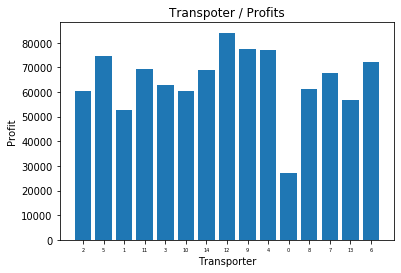

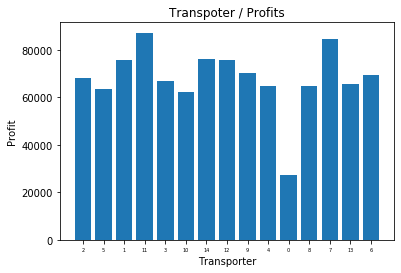

In [19]:
show_total_profits_per_transpoter('new_simulations_with_est/500_LOW_PRICE_LENIENT_15_500_12_10_10_pagerank_False')